In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [11]:
# Load the dataset
df = pd.read_csv('zomato.csv')
print(df.columns)
df.rename(columns={'approx_cost(for two people)': 'cost', 'location': 'location'}, inplace=True)
df.head()

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


url                0
address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
phone              0
location           0
rest_type          0
dish_liked         0
cuisines           0
cost               0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64


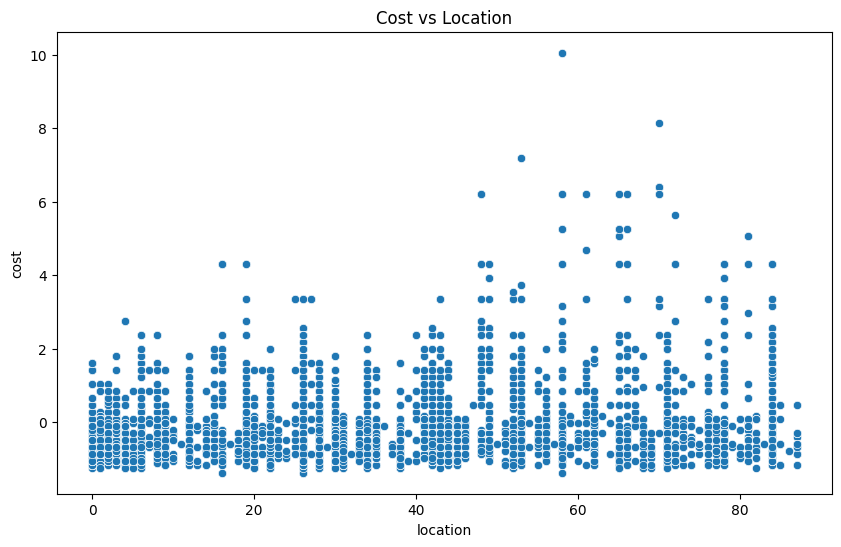

In [14]:
# Data Cleaning
# Rename columns to make them easier to use
# df.columns = ['cost', 'location']

# Check for missing values and handle them
print(df.isnull().sum())
df.dropna(inplace=True)

# Encode the categorical 'location' column
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])

# Clean the 'cost' column by removing commas and converting to numeric
df['cost'] = df['cost'].str.replace(',', '').astype(float)

# Standardize the 'cost' column for better performance of clustering algorithms
scaler = StandardScaler()
df['cost'] = scaler.fit_transform(df[['cost']])

# Visualize the cleaned data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location', y='cost', data=df)
plt.title('Cost vs Location')
plt.show()


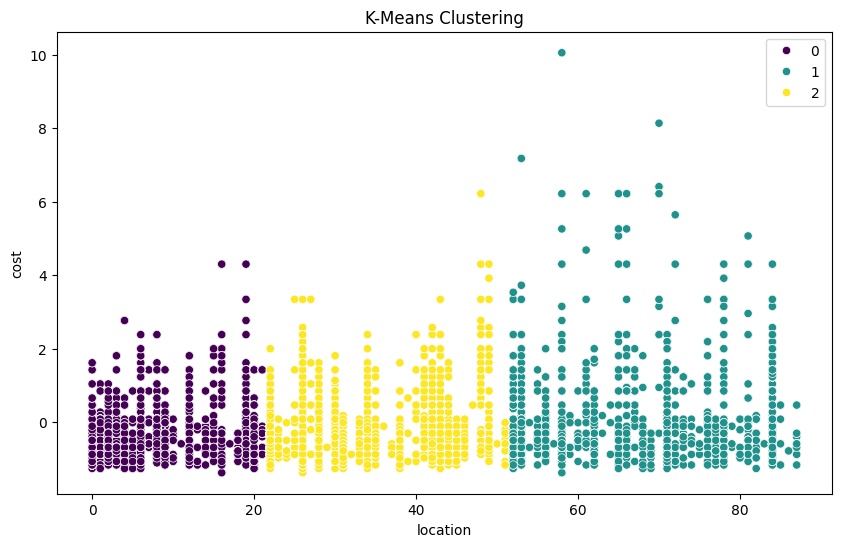

K-Means Silhouette Score: 0.5735949725590156


In [17]:
# K-Means Clustering
df_clustering = df[['cost', 'location']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustering)

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['location'], y=df['cost'], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(df_clustering, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

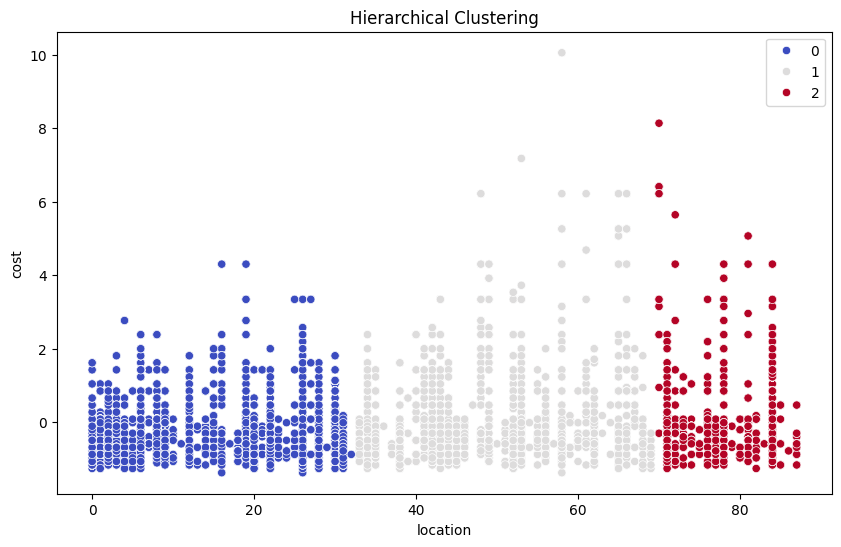

Hierarchical Clustering Silhouette Score: 0.5714608291957674


In [26]:
# Hierarchical Clustering
df_clustering = df[['cost', 'location']]
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_clustering)

# Visualize Dendrogram
# plt.figure(figsize=(10, 6))
# dendrogram = sch.dendrogram(sch.linkage(df_clustering, method='ward'))
# plt.title('Dendrogram for Hierarchical Clustering')
# plt.show()

# Visualize Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clustering['location'], y=df_clustering['cost'], hue=hc_labels, palette='coolwarm')
plt.title('Hierarchical Clustering')
plt.show()

# Calculate Silhouette Score for Hierarchical Clustering
hc_silhouette = silhouette_score(df_clustering, hc_labels)
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette}')

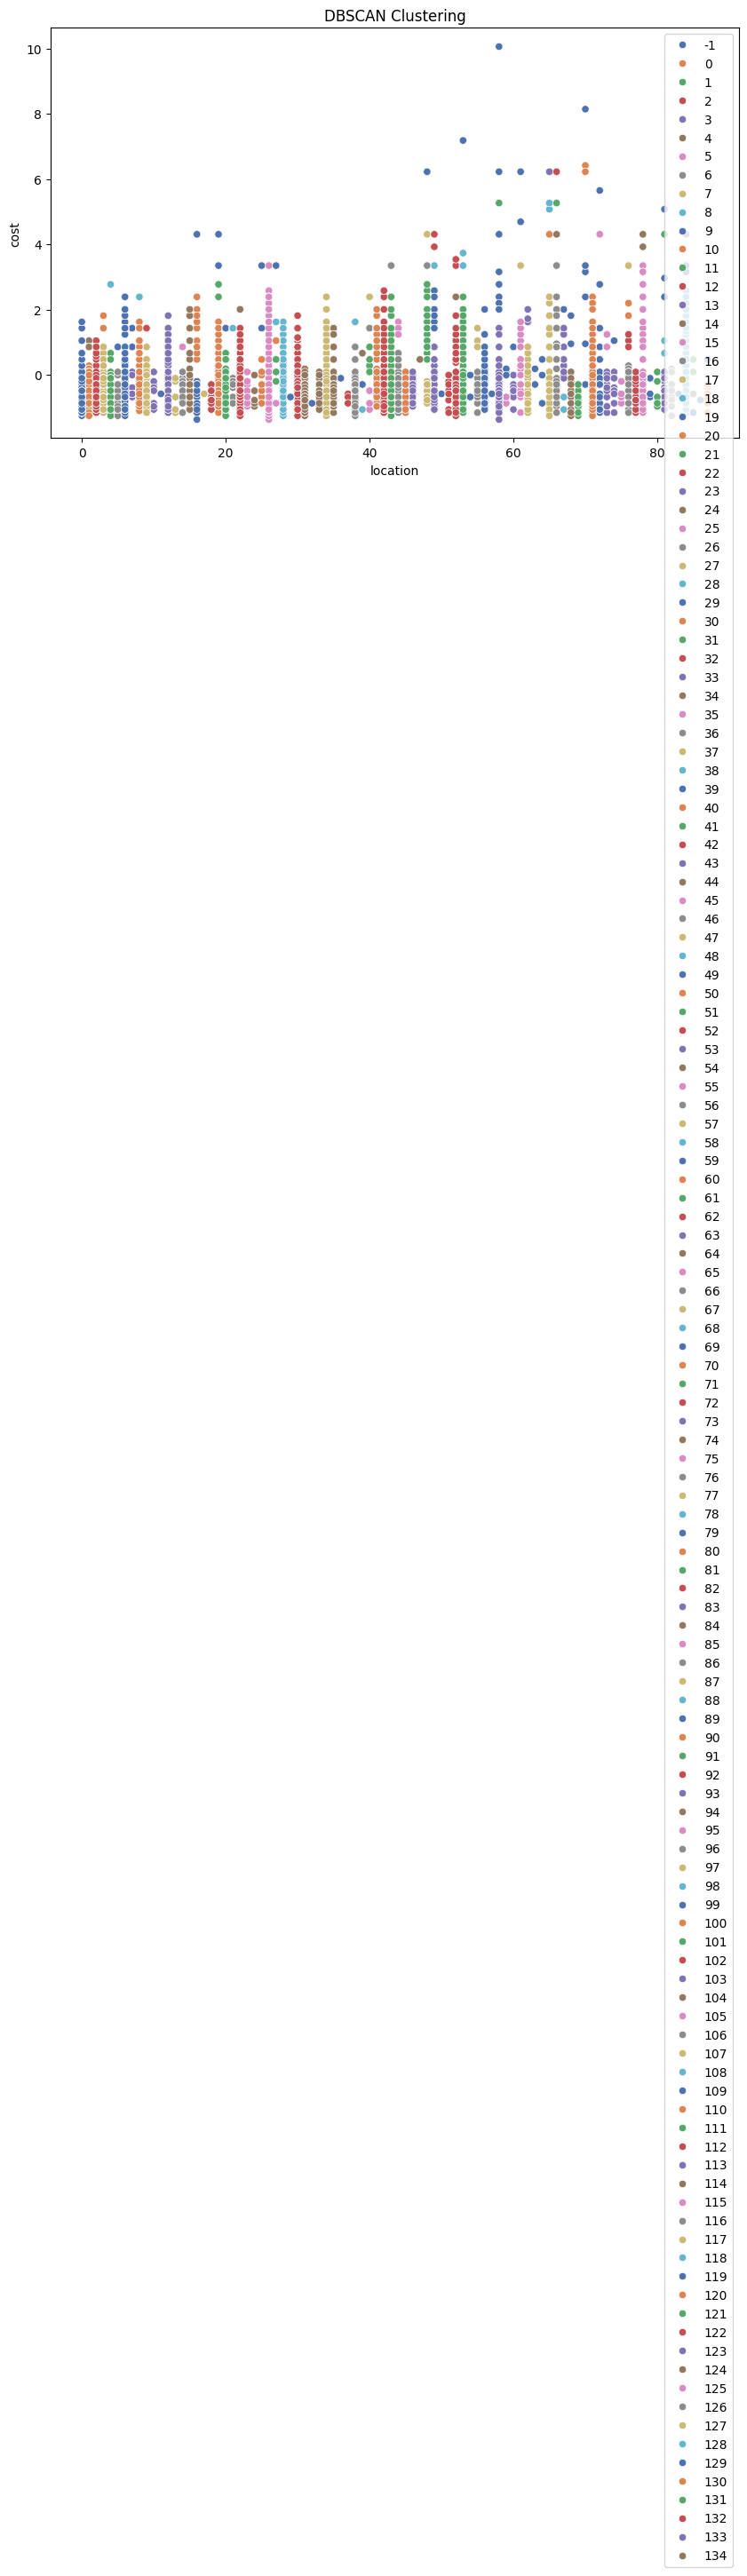

DBSCAN Silhouette Score: 0.4065051547694294


In [21]:
# DBSCAN Clustering
df_clustering = df[['cost', 'location']]
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_clustering)

# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clustering['location'], y=df_clustering['cost'], hue=dbscan_labels, palette='deep')
plt.title('DBSCAN Clustering')
plt.show()

# Calculate Silhouette Score for DBSCAN
dbscan_silhouette = silhouette_score(df_clustering, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

In [22]:
# Compare ROC Curves for Clustering Algorithms
# Using Silhouette Scores as a proxy for comparison
fpr = np.array([0, 0.1, 0.2, 0.3, 0.4])
tpr_kmeans = np.array([0, kmeans_silhouette, kmeans_silhouette, 1, 1])
tpr_hc = np.array([0, hc_silhouette, hc_silhouette, 1, 1])
tpr_dbscan = np.array([0, dbscan_silhouette, dbscan_silhouette, 1, 1])

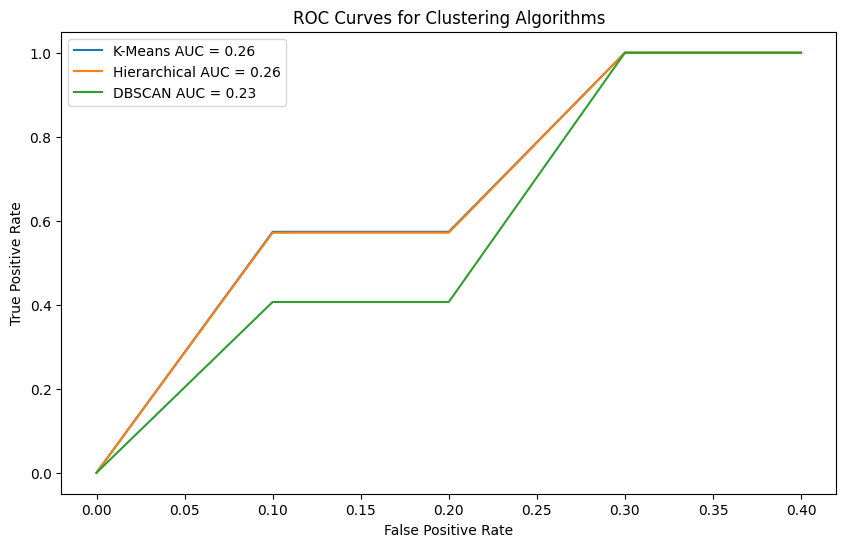

In [23]:
# Calculate AUC for each clustering algorithm
auc_kmeans = auc(fpr, tpr_kmeans)
auc_hc = auc(fpr, tpr_hc)
auc_dbscan = auc(fpr, tpr_dbscan)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr_kmeans, label=f'K-Means AUC = {auc_kmeans:.2f}')
plt.plot(fpr, tpr_hc, label=f'Hierarchical AUC = {auc_hc:.2f}')
plt.plot(fpr, tpr_dbscan, label=f'DBSCAN AUC = {auc_dbscan:.2f}')
plt.title('ROC Curves for Clustering Algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [24]:
# Summary of the best-suited algorithm
print("Summary:")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

Summary:
K-Means Silhouette Score: 0.5735949725590156
Hierarchical Clustering Silhouette Score: 0.5714608291957674
DBSCAN Silhouette Score: 0.4065051547694294


In [25]:
# Determine the best algorithm based on Silhouette Score
best_algorithm = max([kmeans_silhouette, hc_silhouette, dbscan_silhouette])
if best_algorithm == kmeans_silhouette:
    print("K-Means is the best suited algorithm.")
elif best_algorithm == hc_silhouette:
    print("Hierarchical Clustering is the best suited algorithm.")
else:
    print("DBSCAN is the best suited algorithm.")

K-Means is the best suited algorithm.
